# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [178]:
# !pip install pycountry_convert 
# !pip install folium
# !pip install seaborn
# !pip install plotly


In [179]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [180]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [181]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [182]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [183]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [184]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
list_dates = list(dates)
end_date = '7/19/20'
for date in dates:
    case_in_date,  deaths_in_date, recoveries_in_date = confirmed[date].sum(), deaths[date].sum(), recoveries[date].sum()
    active = confirmed[date].sum() - deaths[date].sum() - recoveries[date].sum()
    total_cases.append(case_in_date)
    total_deaths.append(deaths_in_date)
    total_recovered.append(recoveries_in_date)
    total_active.append(active)
    if date == end_date:
        break;

In [185]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  14505270
Total death cases:  655135
Total recoveries cases:  8133881
Total active cases:  5716254


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

Text(0.5, 1.0, 'Log of # of Coronavirus Cases Over Time')

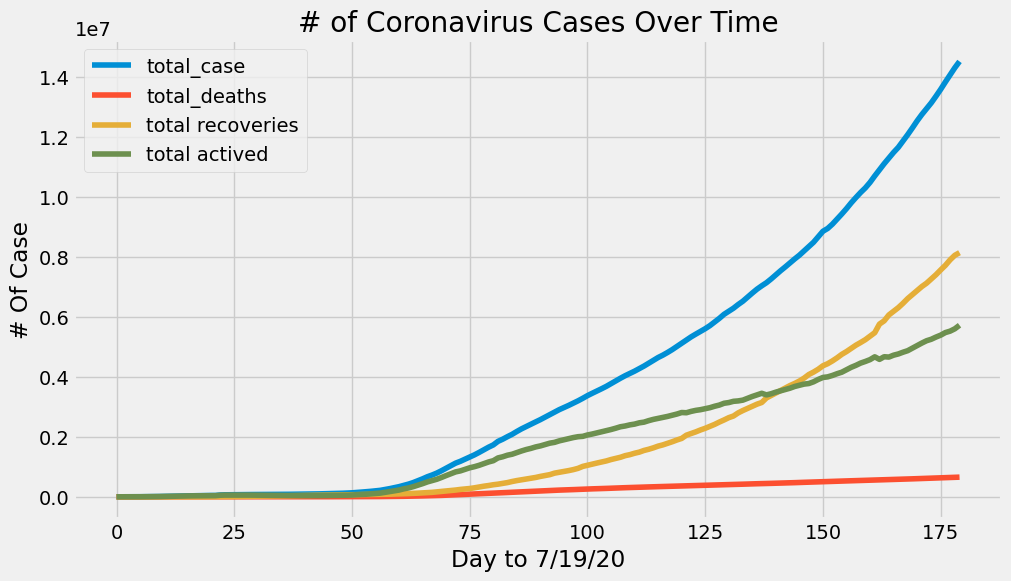

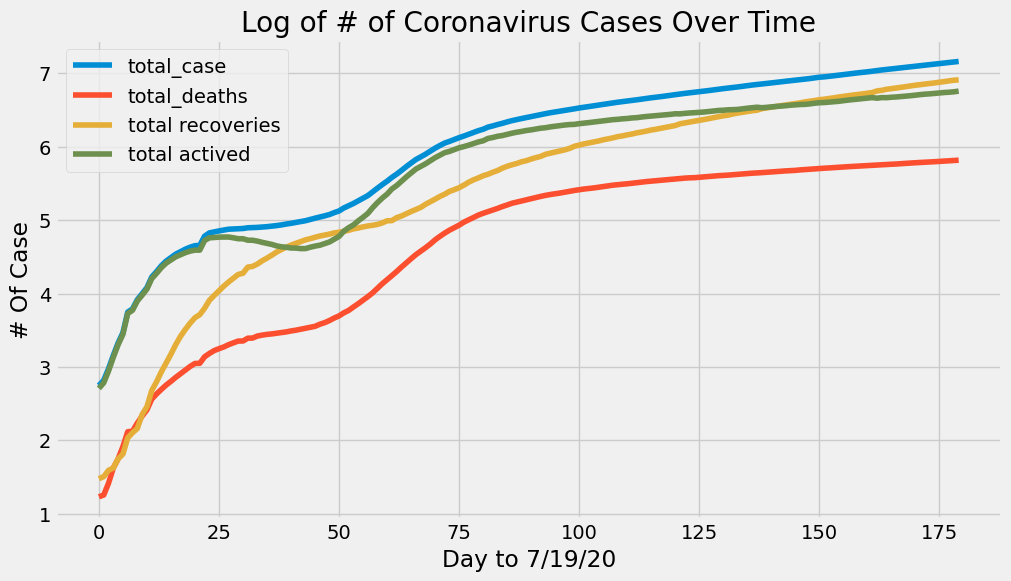

In [186]:
#Insert your code here:

date = '7/19/20' #Choose date

fig1, ax1 = plt.subplots(figsize=(10, 5.7), layout='constrained')
end = list_dates.index(date)+1

ax1.plot(total_cases[:end],label='total_case')  
ax1.plot(total_deaths[:end], label='total_deaths')  
ax1.plot(total_recovered[:end], label='total recoveries') 
ax1.plot(total_active[:end], label='total actived')
ax1.legend()

ax1.set_xlabel('Day to '+date)  
ax1.set_ylabel('# Of Case')  
ax1.set_title("# of Coronavirus Cases Over Time") 

import math
fig2, ax2 = plt.subplots(figsize=(10, 5.7), layout='constrained')

ax2.plot([math.log10(i) for i in total_cases[:end]],label='total_case')  
ax2.plot([math.log10(i) for i in total_deaths[:end]], label='total_deaths')  
ax2.plot([math.log10(i) for i in total_recovered[:end]], label='total recoveries') 
ax2.plot([math.log10(i) for i in total_active[:end]], label='total actived')
ax2.legend()

ax2.set_xlabel('Day to '+date)  
ax2.set_ylabel('# Of Case')  
ax2.set_title("Log of # of Coronavirus Cases Over Time") 


## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

Text(0.5, 1.0, '# of Coronavirus Cases Over Time')

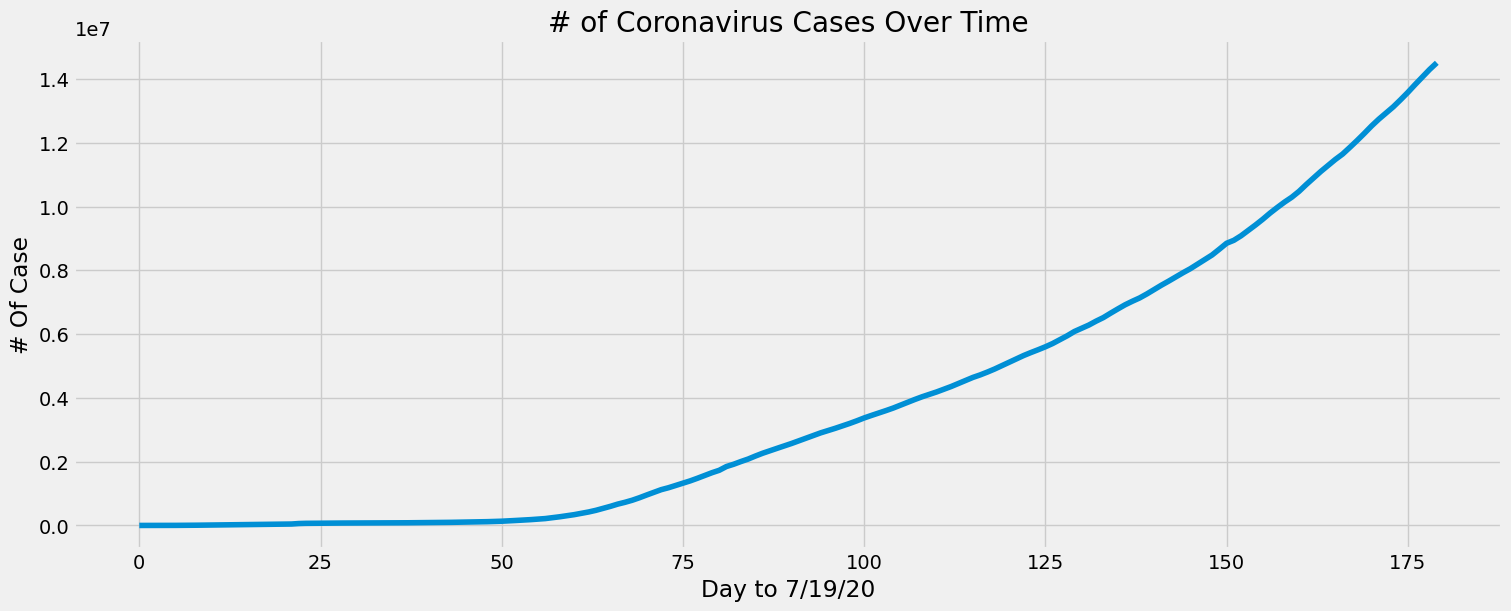

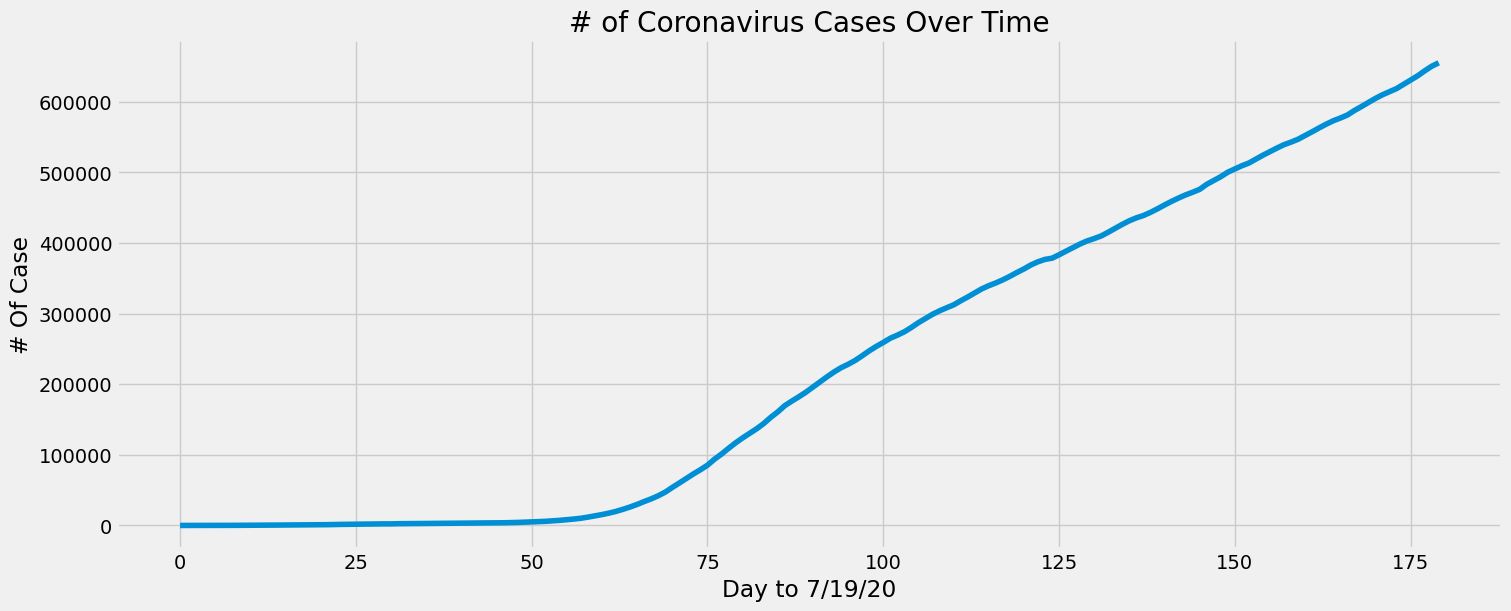

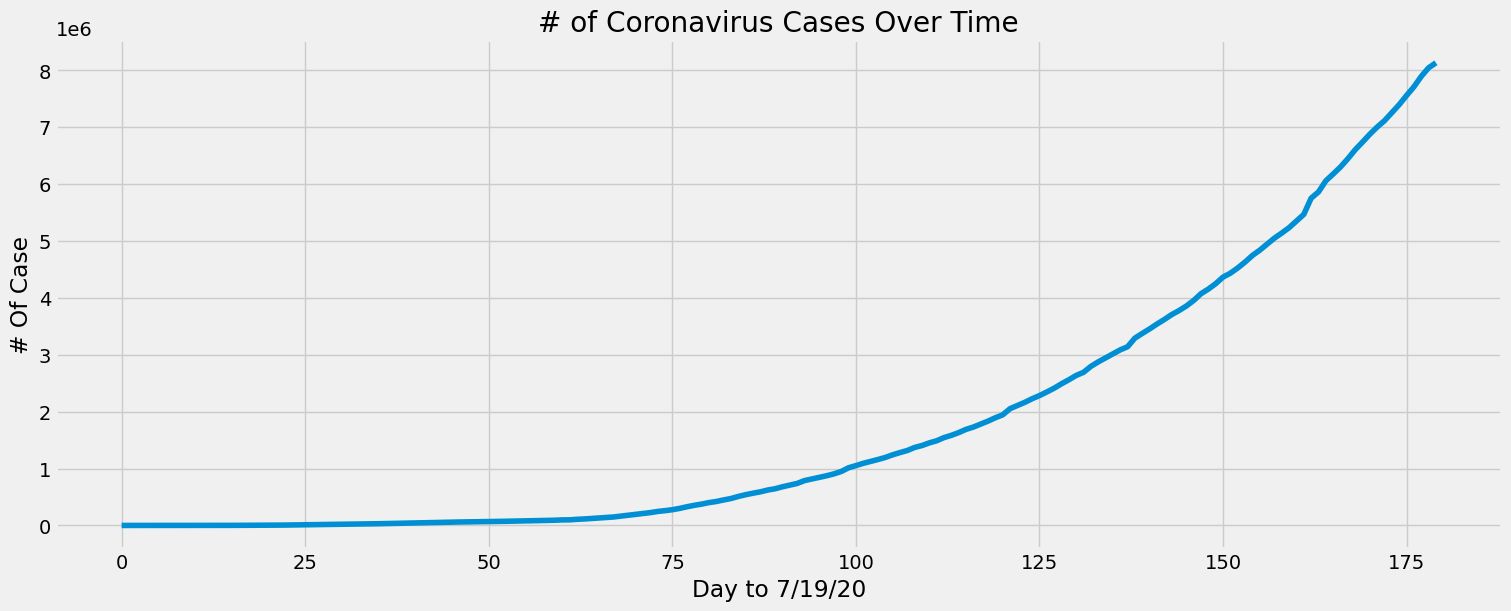

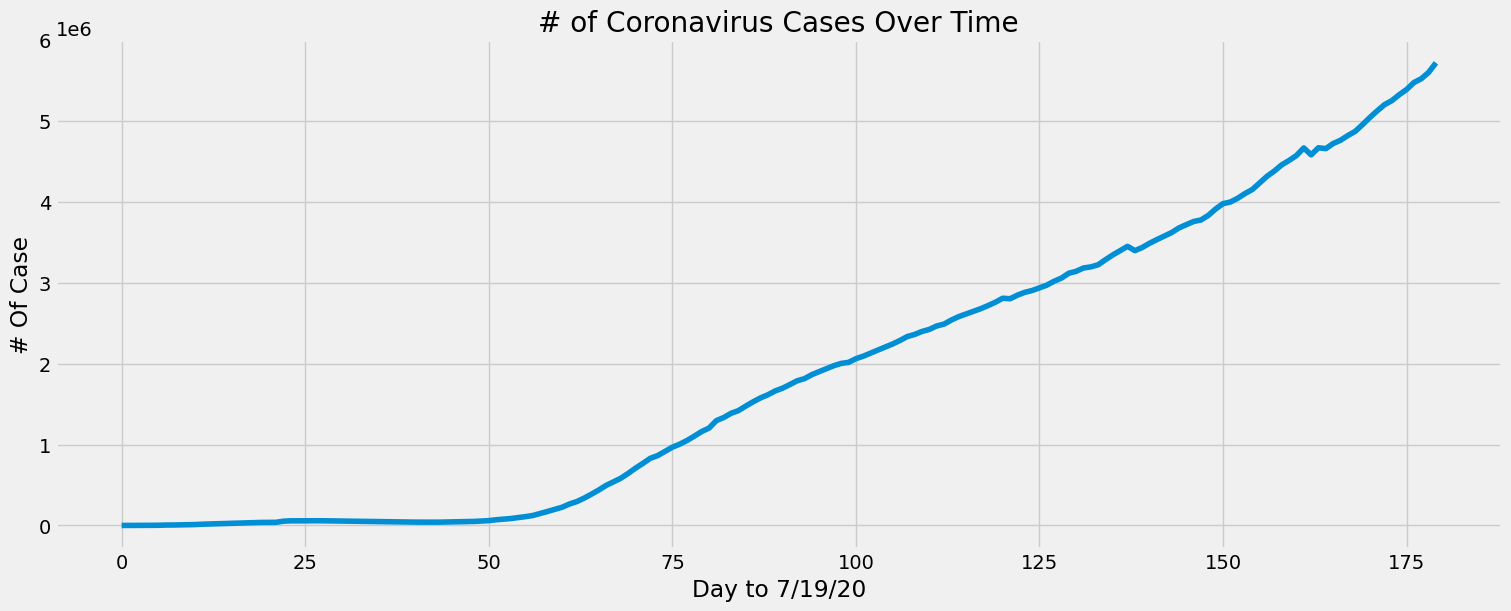

In [187]:
#Insert your code here:

date = '7/19/20' #Choose date
end = list_dates.index(date)+1

fig1, ax1 = plt.subplots(figsize=(15, 6), layout='constrained')
ax1.plot(total_cases[:end],label='total_case')  

fig2, ax2 = plt.subplots(figsize=(15, 6), layout='constrained')
ax2.plot(total_deaths[:end], label='total_deaths')  

fig3, ax3 = plt.subplots(figsize=(15, 6), layout='constrained')
ax3.plot(total_recovered[:end], label='total recoveries') 

fig4, ax4 = plt.subplots(figsize=(15, 6), layout='constrained')
ax4.plot(total_active[:end], label='total actived')

ax1.set_xlabel('Day to '+date)  
ax1.set_ylabel('# Of Case')  
ax1.set_title("# of Coronavirus Cases Over Time") 

ax2.set_xlabel('Day to '+date)  
ax2.set_ylabel('# Of Case')  
ax2.set_title("# of Coronavirus Cases Over Time") 

ax3.set_xlabel('Day to '+date)  
ax3.set_ylabel('# Of Case')  
ax3.set_title("# of Coronavirus Cases Over Time") 

ax4.set_xlabel('Day to '+date)  
ax4.set_ylabel('# Of Case')  
ax4.set_title("# of Coronavirus Cases Over Time") 

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [188]:
#Insert your code here:
date = '7/19/20' #Choose date
end = list_dates.index(date)-1

increases_total_cases=[total_cases[i+1]-total_cases[i] for i in range(len(total_cases)-1)]
increases_total_deaths=[total_deaths[i+1]-total_deaths[i] for i in range(len(total_deaths)-1)]
increases_total_recovered=[total_recovered[i+1]-total_recovered[i] for i in range(len(total_recovered)-1)]
increases_total_active=[total_active[i+1]-total_active[i] for i in range(len(total_active)-1)]

print(increases_total_cases[end])
print(increases_total_deaths[end])
print(increases_total_recovered[end])
print(increases_total_active[end])


211891
4894
88058
118939


## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

In [189]:
list_dates.index('7/19/20')

179

Text(0.5, 1.0, 'Visualize the number of daily increases')

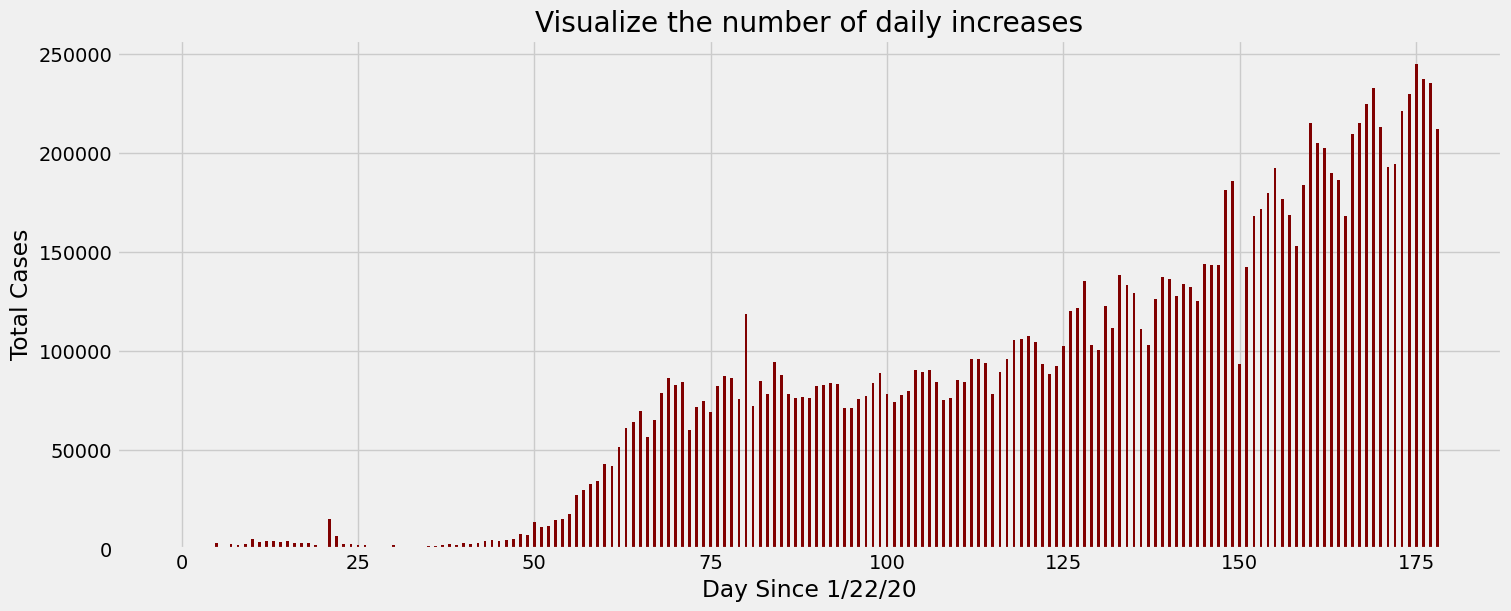

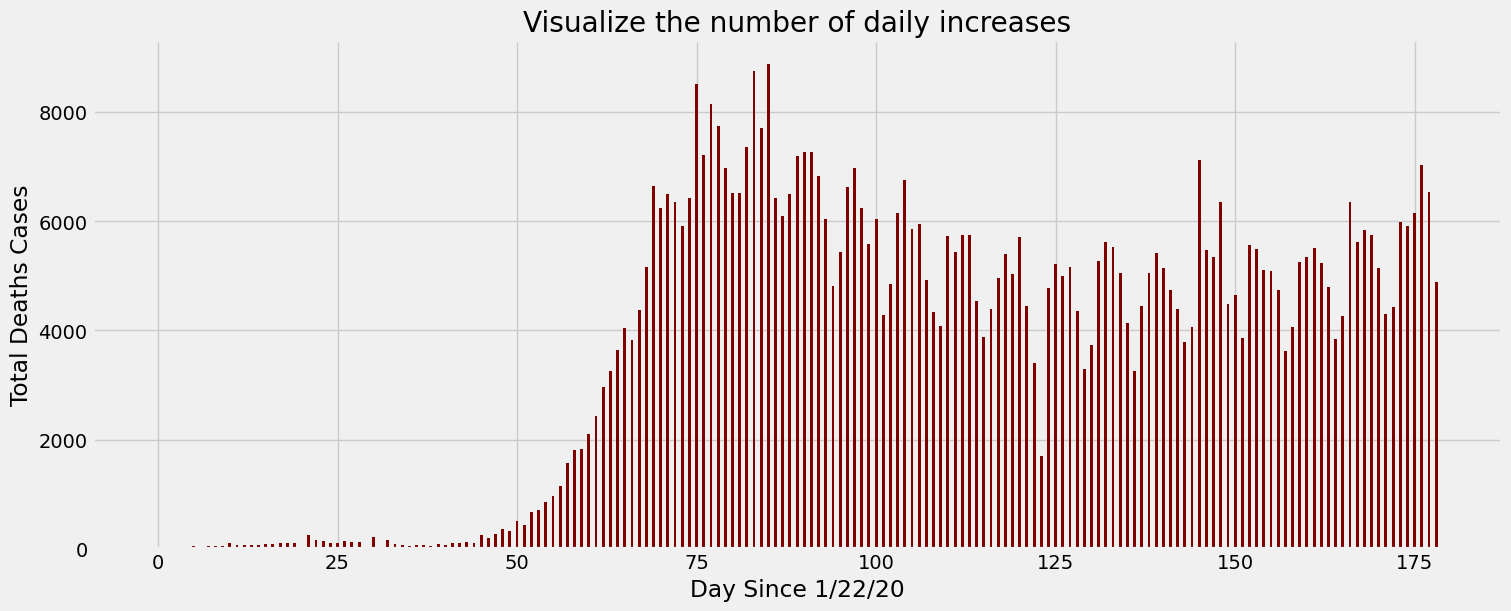

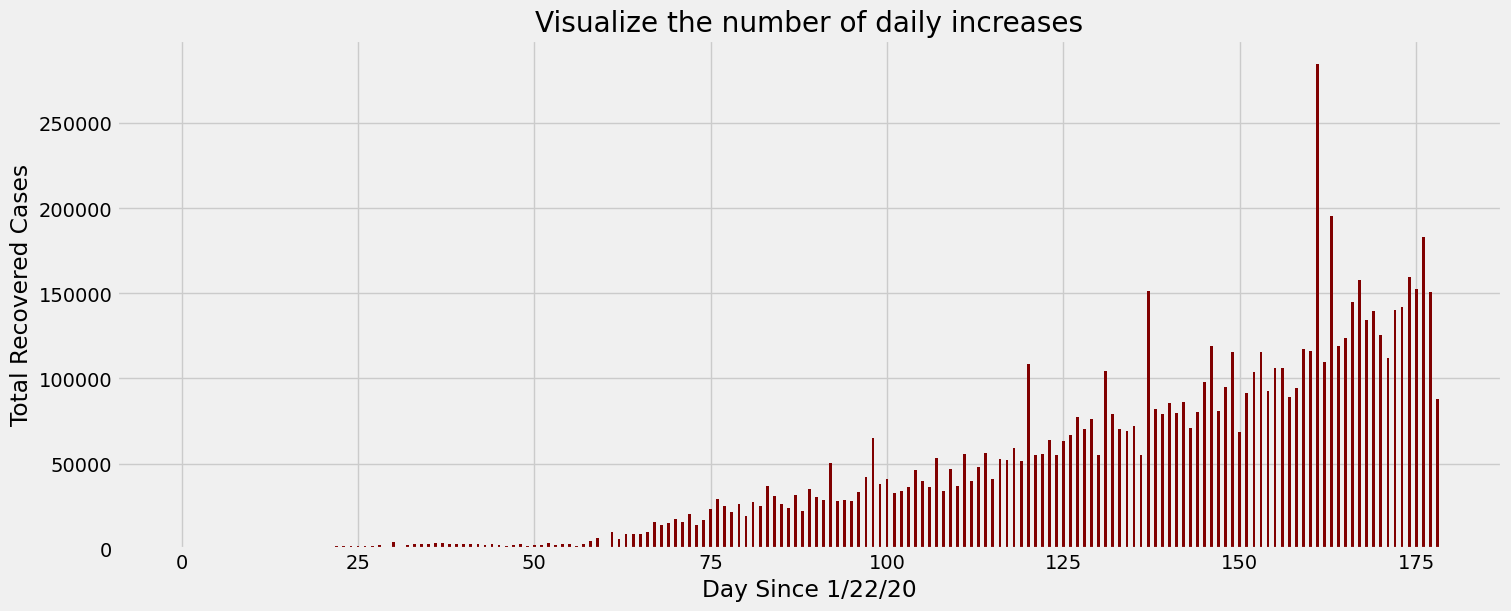

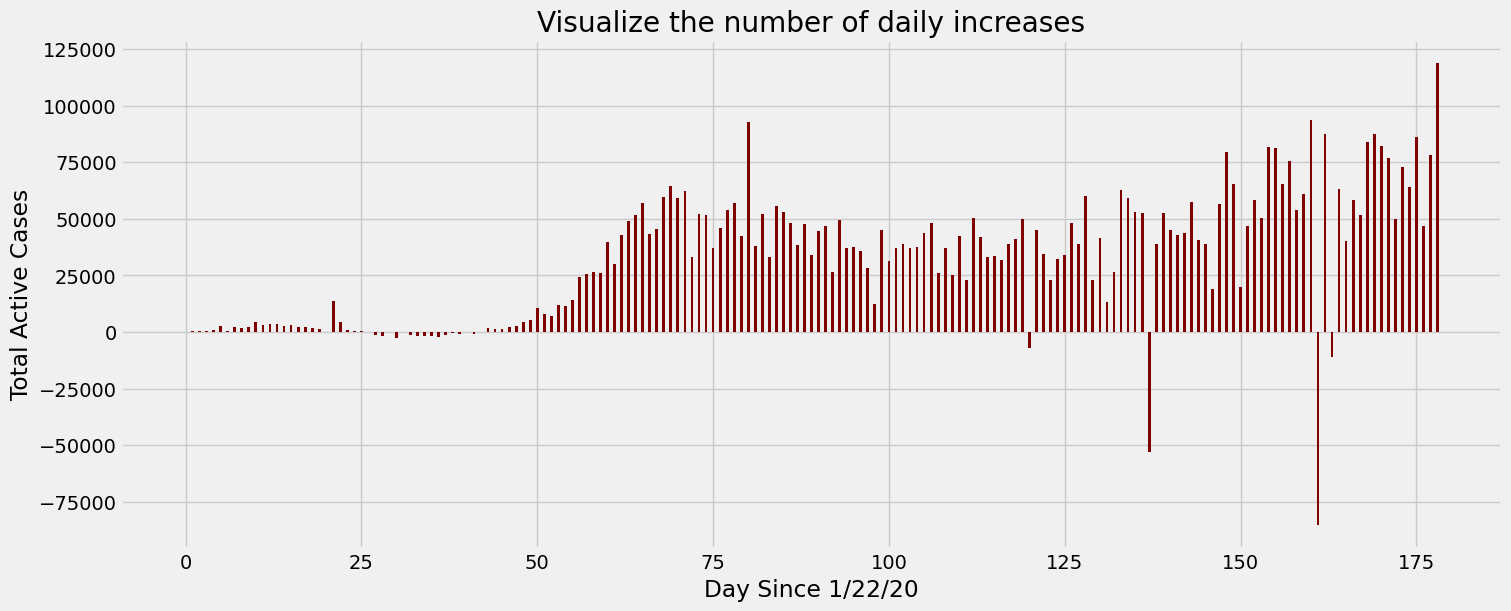

In [190]:
date = '7/19/20' #Choose date



fig1, ax1 = plt.subplots(figsize=(15, 6), layout='constrained')
ax1.bar(np.array(range(list_dates.index(date))),increases_total_cases, color ='maroon',width = 0.4)
ax1.set_xlabel("Day Since 1/22/20")
ax1.set_ylabel("Total Cases")
ax1.set_title("Visualize the number of daily increases")

fig2, ax2 = plt.subplots(figsize=(15, 6), layout='constrained')
ax2.bar(np.array(range(list_dates.index(date))),increases_total_deaths, color ='maroon',width = 0.4)
ax2.set_xlabel("Day Since 1/22/20")
ax2.set_ylabel("Total Deaths Cases")
ax2.set_title("Visualize the number of daily increases")

fig3, ax3 = plt.subplots(figsize=(15, 6), layout='constrained')
ax3.bar(np.array(range(list_dates.index(date))),increases_total_recovered, color ='maroon',width = 0.4)
ax3.set_xlabel("Day Since 1/22/20")
ax3.set_ylabel("Total Recovered Cases")
ax3.set_title("Visualize the number of daily increases")

fig4, ax4 = plt.subplots(figsize=(15, 6), layout='constrained')
ax4.bar(np.array(range(list_dates.index(date))),increases_total_active, color ='maroon',width = 0.4)
ax4.set_xlabel("Day Since 1/22/20")
ax4.set_ylabel("Total Active Cases")
ax4.set_title("Visualize the number of daily increases")


# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [191]:
#Insert your code here:
date ="7/19/20"
end = list_dates.index(date)
mortality = [total_deaths[i]/total_cases[i] for i in range(end)]
recovered_rate = [total_recovered[i]/total_cases[i] for i in range(end)]
print('Mortality = ',mortality[end-1])
print('Recovered rate = ',recovered_rate[end-1])

Mortality =  0.04549246192940102
Recovered rate =  0.5629055942615109


# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

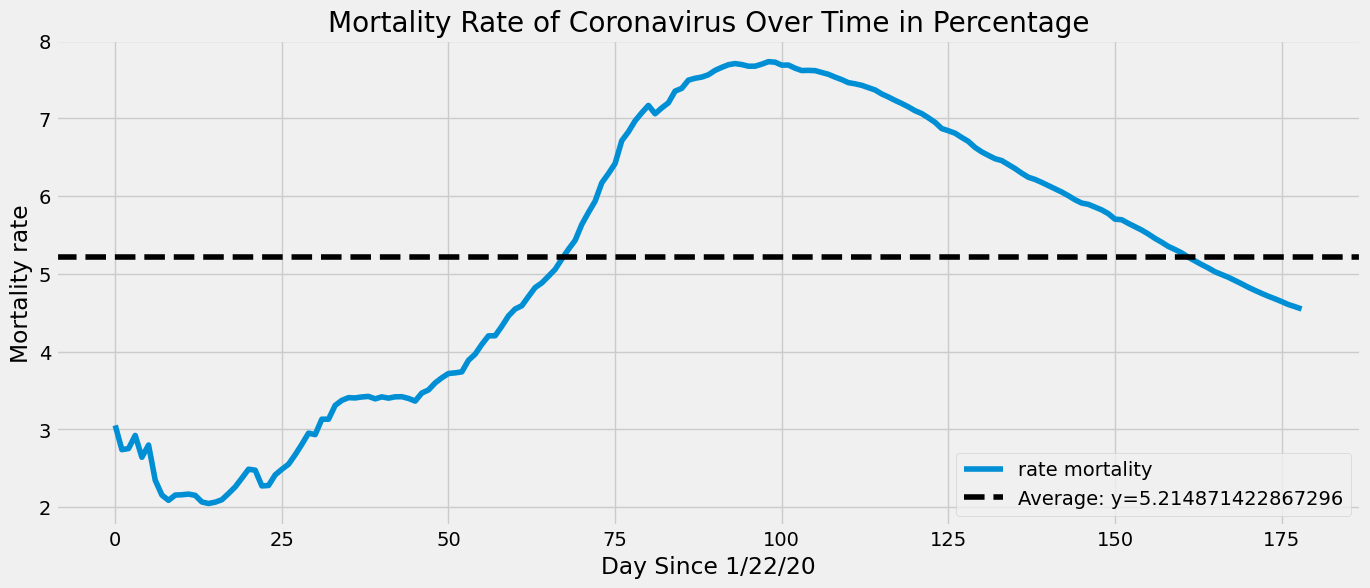

In [192]:
#Insert your code here:
import matplotlib.pyplot as plt

x_axis = [mortality[i]*100 for i in range(end)]
average_mortality = np.average(x_axis)
plt.figure(figsize=(15,6))
plt.plot(x_axis,label='rate mortality')
plt.title('Mortality Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Day Since 1/22/20')
plt.ylabel('Mortality rate')
plt.axhline(y=average_mortality, color='black', linestyle='--', label="Average: y="+str(average_mortality) )
plt.plot(np.average(x_axis), linestyle='dashed')
plt.legend(loc = "lower right")

plt.show()


**7.2** 

    Visualize the recovery rate in by time (day units) using the line chart.

    Using the dashline to visualize the average recovery rate of all the time.

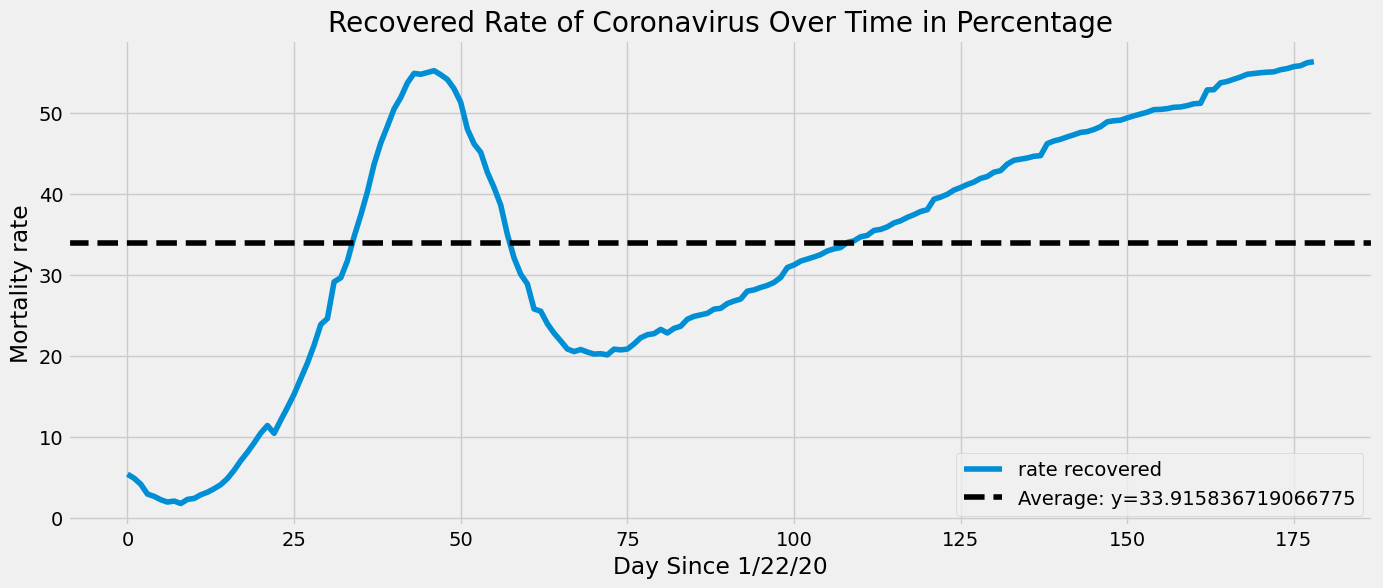

In [193]:
#Insert your code here:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
x_axis = [recovered_rate[i]*100 for i in range(end)]
average_recovered = np.average(x_axis)
x_axis
plt.plot(x_axis,label = 'rate recovered')
plt.title('Recovered Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Day Since 1/22/20')
plt.ylabel('Mortality rate')
plt.axhline(y=average_recovered, color='black', linestyle='--', label="Average: y="+str(average_recovered) )
plt.plot(np.average(x_axis), linestyle='dashed')
plt.legend(loc = "lower right")
plt.show()

In [194]:
#Insert your code here:



#  5. Continent Analysis

## Data Prerocessing

In [195]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [196]:
country = confirmed_df['Country/Region']

In [197]:
re = [country_to_continent_code(country[i]) for i in range(len(country))]

In [198]:
re = [continents[re[i]] for i in range(len(re))]

In [199]:
confirmed_df.insert(2,'continent',re)

In [200]:
confirmed_df

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,Asia,33.939110,67.709953,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,Europe,41.153300,20.168300,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,Africa,28.033900,1.659600,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,Europe,42.506300,1.521800,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,Africa,-11.202700,17.873900,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,Others,39.904200,116.407400,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,Asia,15.552727,48.516388,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,Africa,-13.133897,27.849332,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [201]:
country = deaths_df['Country/Region']
re = [country_to_continent_code(country[i]) for i in range(len(country))]
re = [continents[re[i]] for i in range(len(re))]

In [202]:
deaths_df.insert(2,'continent',re)

In [203]:
deaths_df

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,Asia,33.939110,67.709953,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,Europe,41.153300,20.168300,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,Africa,28.033900,1.659600,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,Europe,42.506300,1.521800,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,Africa,-11.202700,17.873900,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,Others,39.904200,116.407400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,Asia,15.552727,48.516388,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,Africa,-13.133897,27.849332,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [204]:
country = recoveries_df['Country/Region']
re = [country_to_continent_code(country[i]) for i in range(len(country))]
re = [continents[re[i]] for i in range(len(re))]

In [205]:
recoveries_df.insert(2,'continent',re)

In [206]:
recoveries_df

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,Asia,33.939110,67.709953,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,Europe,41.153300,20.168300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,Africa,28.033900,1.659600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,Europe,42.506300,1.521800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,Africa,-11.202700,17.873900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,Others,39.904200,116.407400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,Asia,15.552727,48.516388,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,Africa,-13.133897,27.849332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
#Insert your code here:


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [208]:
index = list(confirmed_df['Country/Region'])

In [209]:
data1 ={'Countries':confirmed_df['Country/Region'],
       'Continents':confirmed_df['continent'],
       'Confirmed':confirmed_df["7/19/20"],
       'Deaths':deaths_df["7/19/20"],
       }
data2 ={'Countries':recoveries_df['Country/Region'],
       'Recoveries':recoveries_df['7/19/20'],
       }

countries_df1 = pd.DataFrame(data=data1)
countries_df2 = pd.DataFrame(data=data2)


countries_df1 =countries_df1.groupby(['Countries','Continents']).sum()
countries_df2 =countries_df2.groupby('Countries').sum()

countries_df1.insert(2,'Recoveries',np.array(countries_df2['Recoveries']))

active = np.array(countries_df1['Confirmed']-countries_df1['Deaths']-countries_df1['Recoveries'])
mortality_rate=np.array(countries_df1['Deaths']/countries_df1['Confirmed'])

countries_df1.insert(3,'Actives',active)
countries_df1.insert(4,'Mortality Rate',mortality_rate*100)

countries_df1 = countries_df1.reset_index()
countries_df=countries_df1.set_index('Countries')
countries_df

,Continents,Confirmed,Deaths,Recoveries,Actives,Mortality Rate
Countries,,,,,,
Afghanistan,Asia,35561,1185,23634,10742,3.332302
Albania,Europe,4090,112,2311,1667,2.738386
Algeria,Africa,23084,1078,16051,5955,4.669901
Andorra,Europe,880,52,803,25,5.909091
Angola,Africa,705,29,221,455,4.113475
...,...,...,...,...,...,...
West Bank and Gaza,Others,8549,62,1921,6566,0.725231
Winter Olympics 2022,Others,0,0,0,0,NaN
Yemen,Asia,1606,445,712,449,27.708593


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [210]:
date ="7/19/20"
end = list_dates.index(date)

In [211]:
data1 ={
       'Continents':confirmed_df['continent'],
       'Confirmed':confirmed_df["7/19/20"],
       'Deaths':deaths_df["7/19/20"],
       }
data2 ={
       'Continents':recoveries_df['continent'],
       'Recoveries':recoveries_df['7/19/20'],
       }

continent_df1 = pd.DataFrame(data=data1)
continent_df2 = pd.DataFrame(data=data2)

continent_df1 = continent_df1.groupby('Continents').sum()
continent_df2 = continent_df2.groupby('Continents').sum()
continent_df1.insert(2,'Recoveries',np.array(continent_df2['Recoveries']))
active = np.array(continent_df1['Confirmed']-continent_df1['Deaths']-continent_df1['Recoveries'])
mortality_rate=np.array(continent_df1['Deaths']/continent_df1['Confirmed'])
continent_df1.insert(3,'Active',active)
continent_df1.insert(4,'Mortality Rate',mortality_rate*100)
continent_df1 = continent_df1.reset_index()
continent_df = continent_df1.set_index('Continents')

In [212]:
continent_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continents,,,,,
Africa,721049,15169,380245,325635,2.103741
Asia,3396986,80203,2411307,905476,2.361005
Australia,13666,146,9927,3593,1.068345
Europe,2658403,210700,1535087,912616,7.925811
North America,4438206,194513,1584688,2659005,4.382694
Others,15382,218,5852,9312,1.417241
South America,3261578,154186,2206775,900617,4.727344


In [213]:
#Insert your code here:


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [214]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [215]:
confirmed_df = confirmed_df.drop(dates[180:],axis=1)
deaths_df = deaths_df.drop(dates[180:],axis=1)
recoveries_df = recoveries_df.drop(dates[180:],axis=1)

In [216]:
dates = dates[0:180]

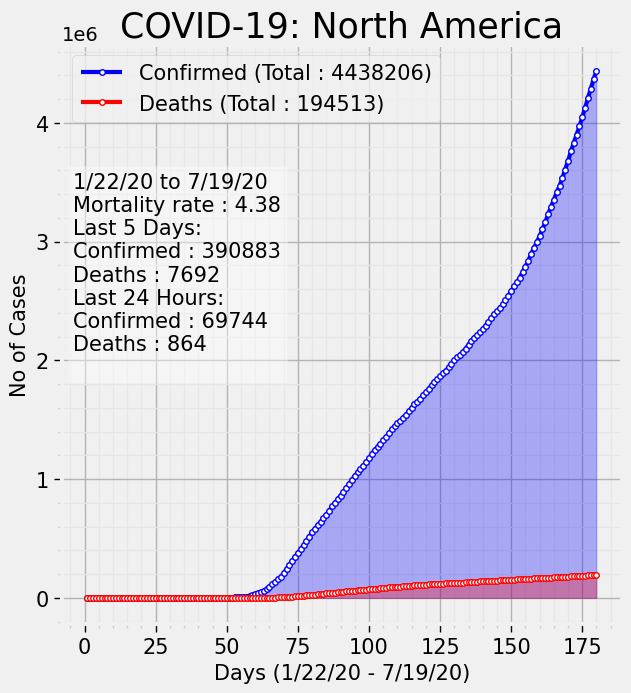

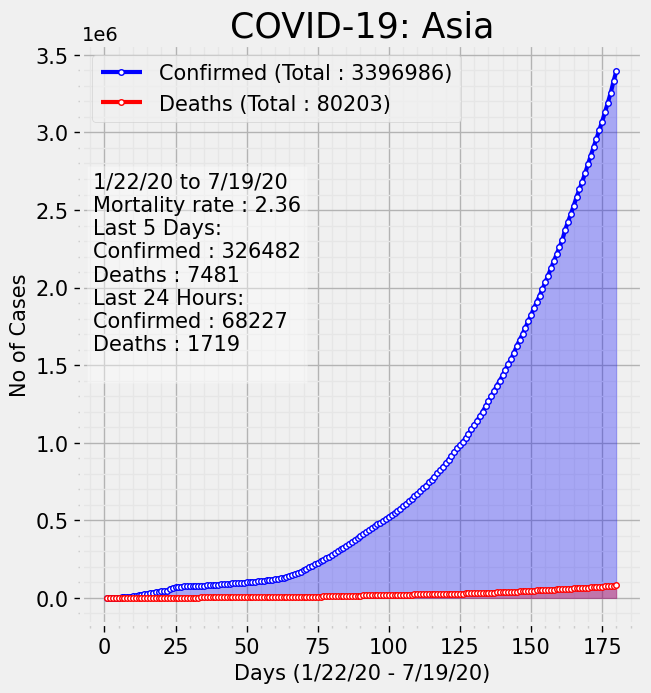

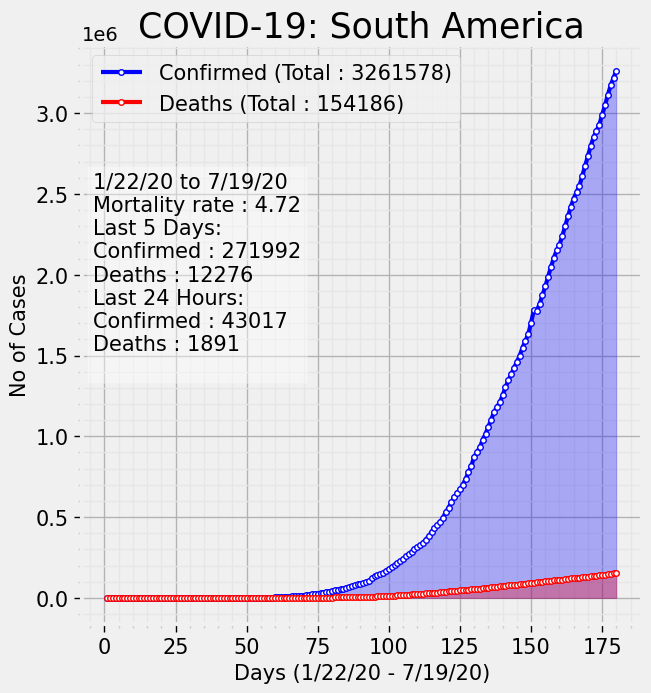

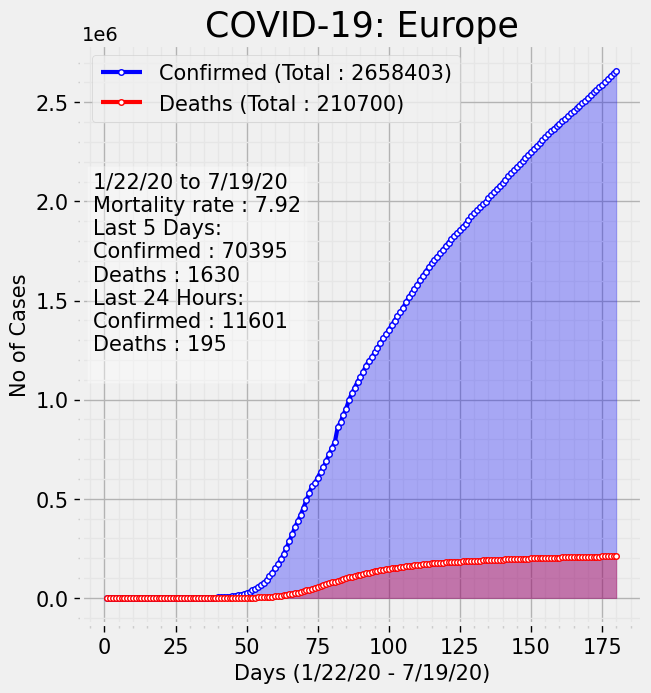

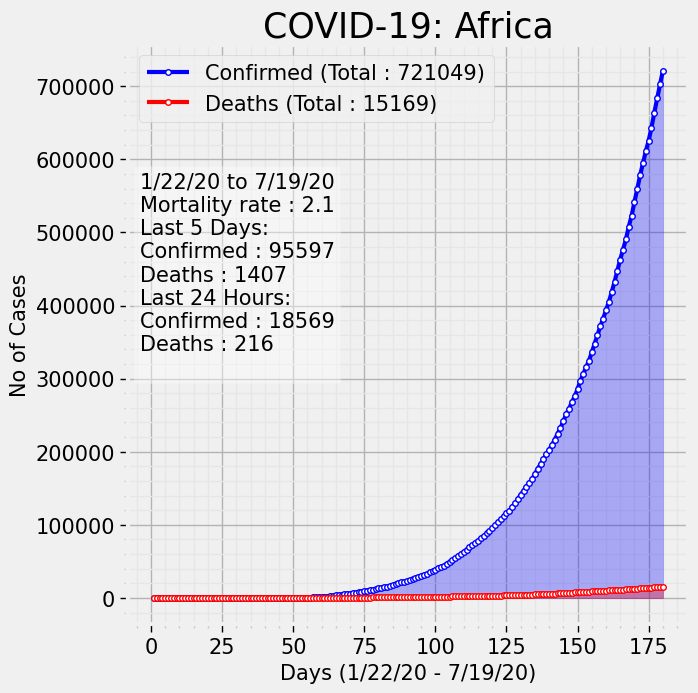

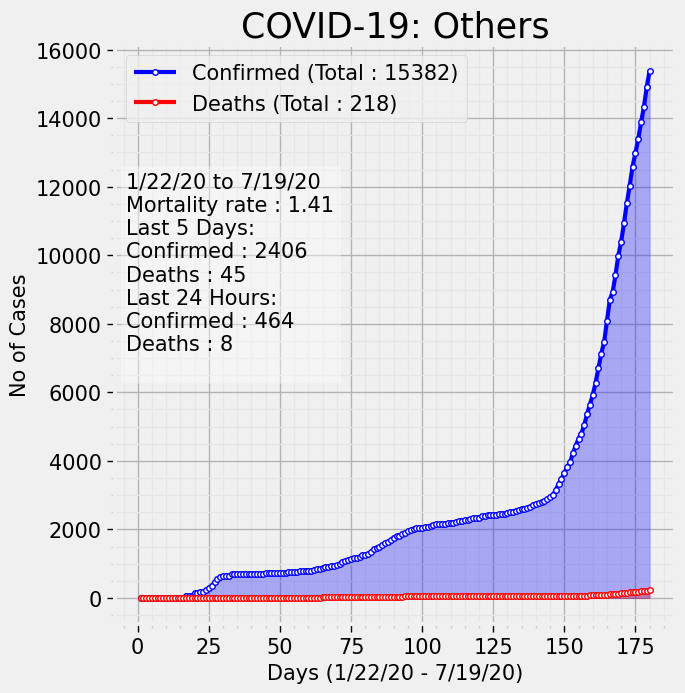

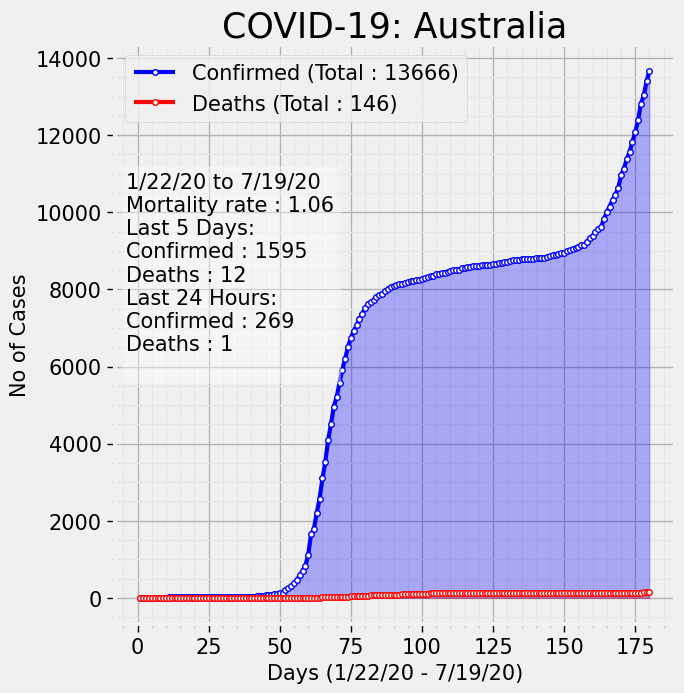

In [217]:
#Insert your code here:

def sort_confirmed_cases(df):
    continents = ['North America', 'South America', 'Asia', 'Australia', 'Africa', 'Europe', 'Others']
    temp_list = []
    for i in range(len(continents)):
        continent_df = confirmed_df.loc[confirmed_df["continent"]==continents[i]]
        columns = dates[-1]
        temp_list.append([continent_df[columns].sum(), continents[i]])
    temp_list.sort(key=lambda x:x[0], reverse = True)
    return temp_list

def input_visualize_covid_cases(continent: list):
    for i in range(len(continent)):
        visualize_covid_cases(confirmed_df, deaths_df, continent[i][1])
        
input_visualize_covid_cases(sort_confirmed_cases(confirmed_df))



**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

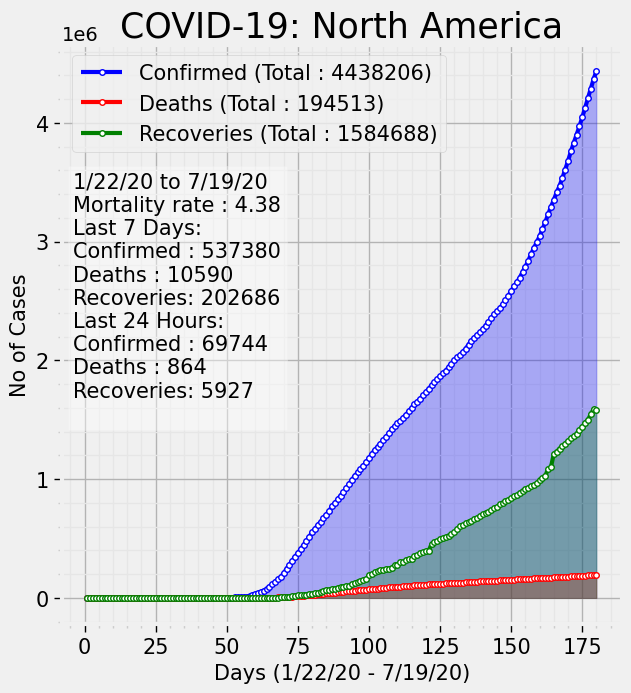

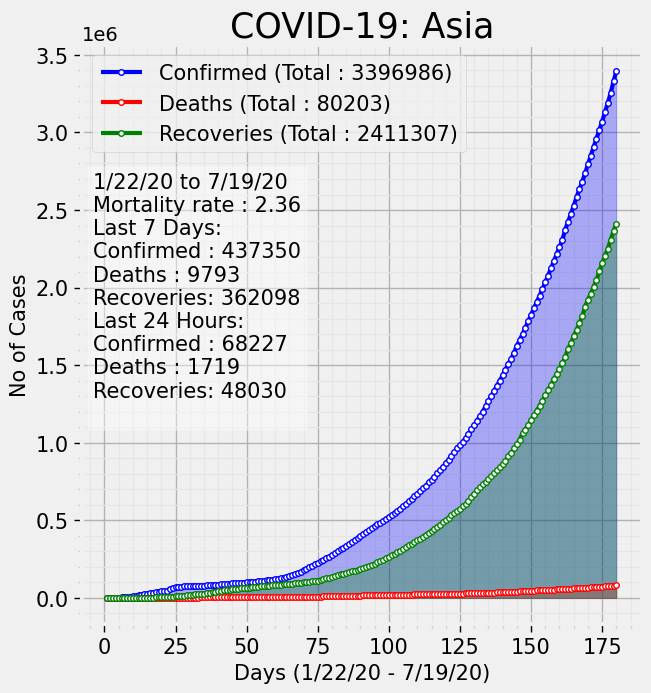

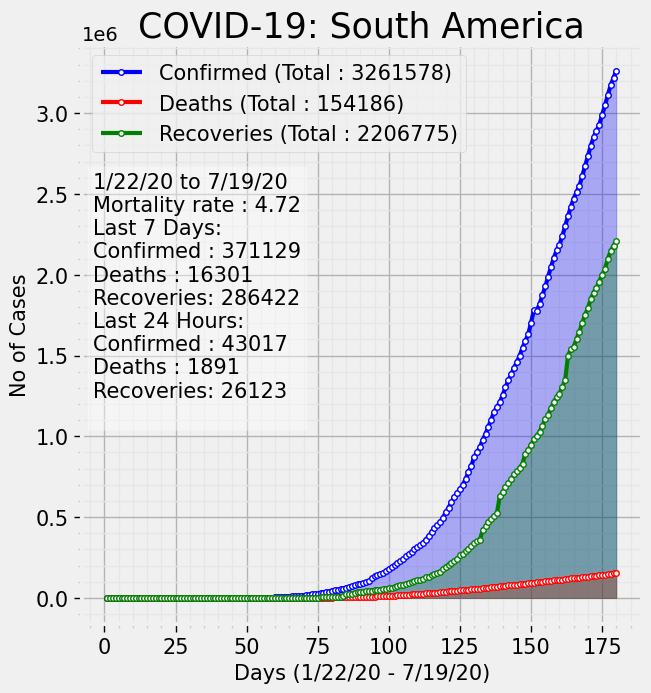

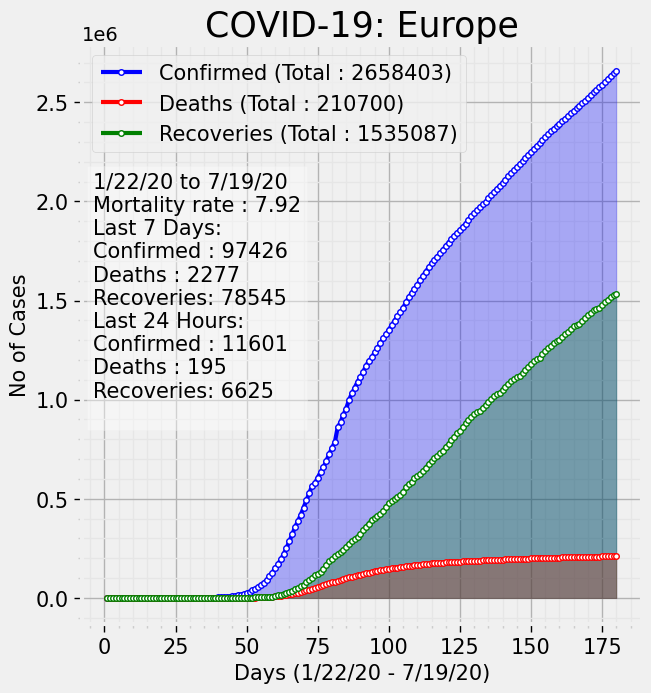

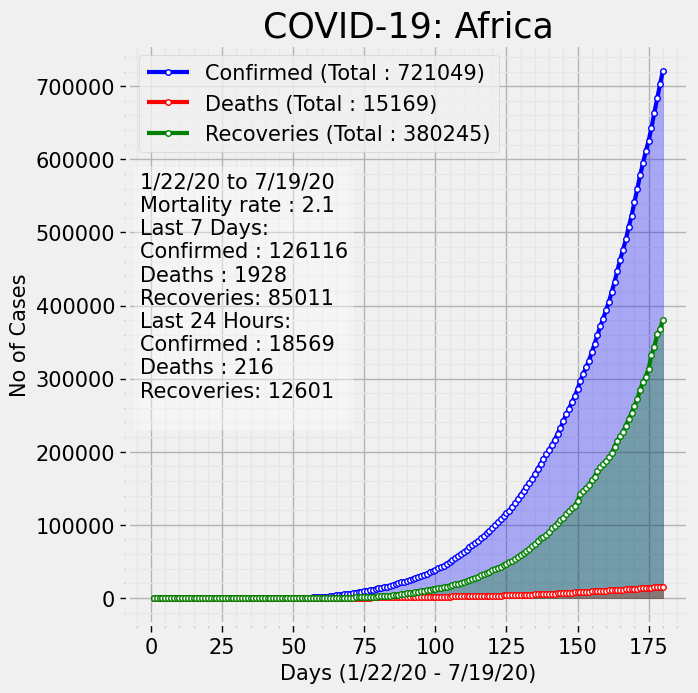

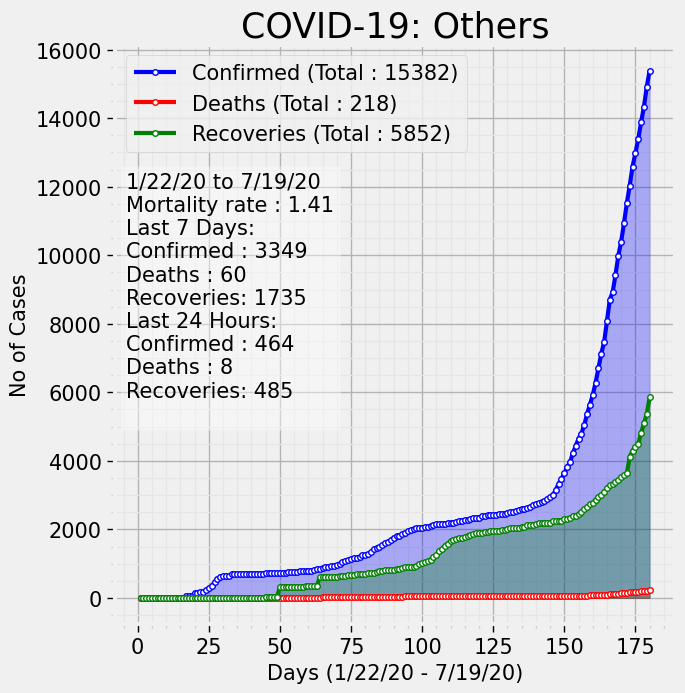

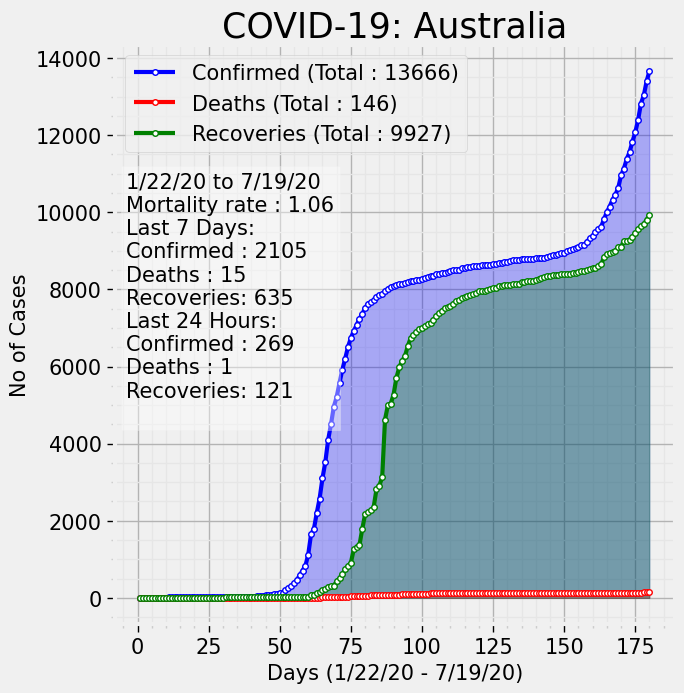

In [218]:
#Insert your code here:
def modified_plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def modified_visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries_df]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(abs(Total_confirmed[-1] - Total_confirmed[-8]))+"\n"
    text += "Deaths : " + str(abs(Total_deaths[-1] - Total_deaths[-8]))+"\n"
    text += "Recoveries: " + str(abs(Total_recoveries[-1] - Total_recoveries[-8]))+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(abs(Total_confirmed[-1] - Total_confirmed[-2]))+"\n"
    text += "Deaths : " + str(abs(Total_deaths[-1] - Total_deaths[-2]))+"\n"
    text += "Recoveries: " + str(abs(Total_recoveries[-1] - Total_recoveries[-2]))+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    modified_plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def input_modified_visualize_covid_cases(continent: list):
    for i in range(len(continent)):
        modified_visualize_covid_cases(confirmed_df, deaths_df,continent[i][1])
        
input_modified_visualize_covid_cases(sort_confirmed_cases(confirmed_df))

# Problem 12
    Visualize the covariance matrix for continents_df.

In [219]:
continent_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continents,,,,,
Africa,721049,15169,380245,325635,2.103741
Asia,3396986,80203,2411307,905476,2.361005
Australia,13666,146,9927,3593,1.068345
Europe,2658403,210700,1535087,912616,7.925811
North America,4438206,194513,1584688,2659005,4.382694
Others,15382,218,5852,9312,1.417241
South America,3261578,154186,2206775,900617,4.727344


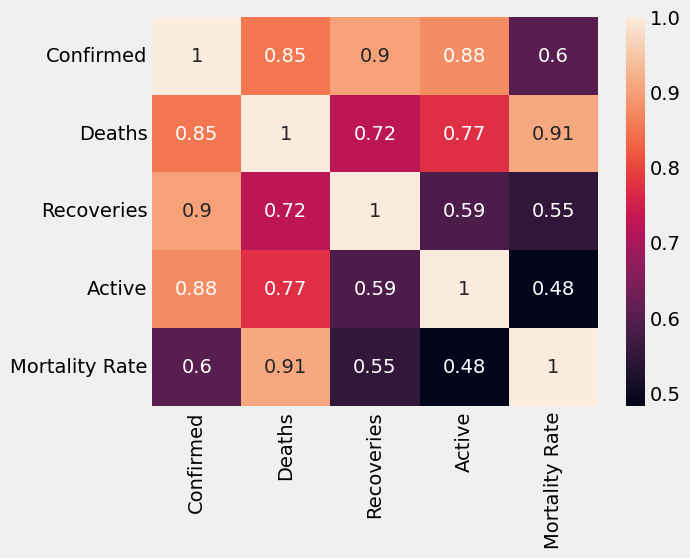

In [220]:
#Insert your code here:
sns.heatmap(continent_df[["Confirmed", "Deaths", "Recoveries", "Active", "Mortality Rate"]].corr(), annot = True)
plt.show()

In [221]:
#Insert your code here:

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

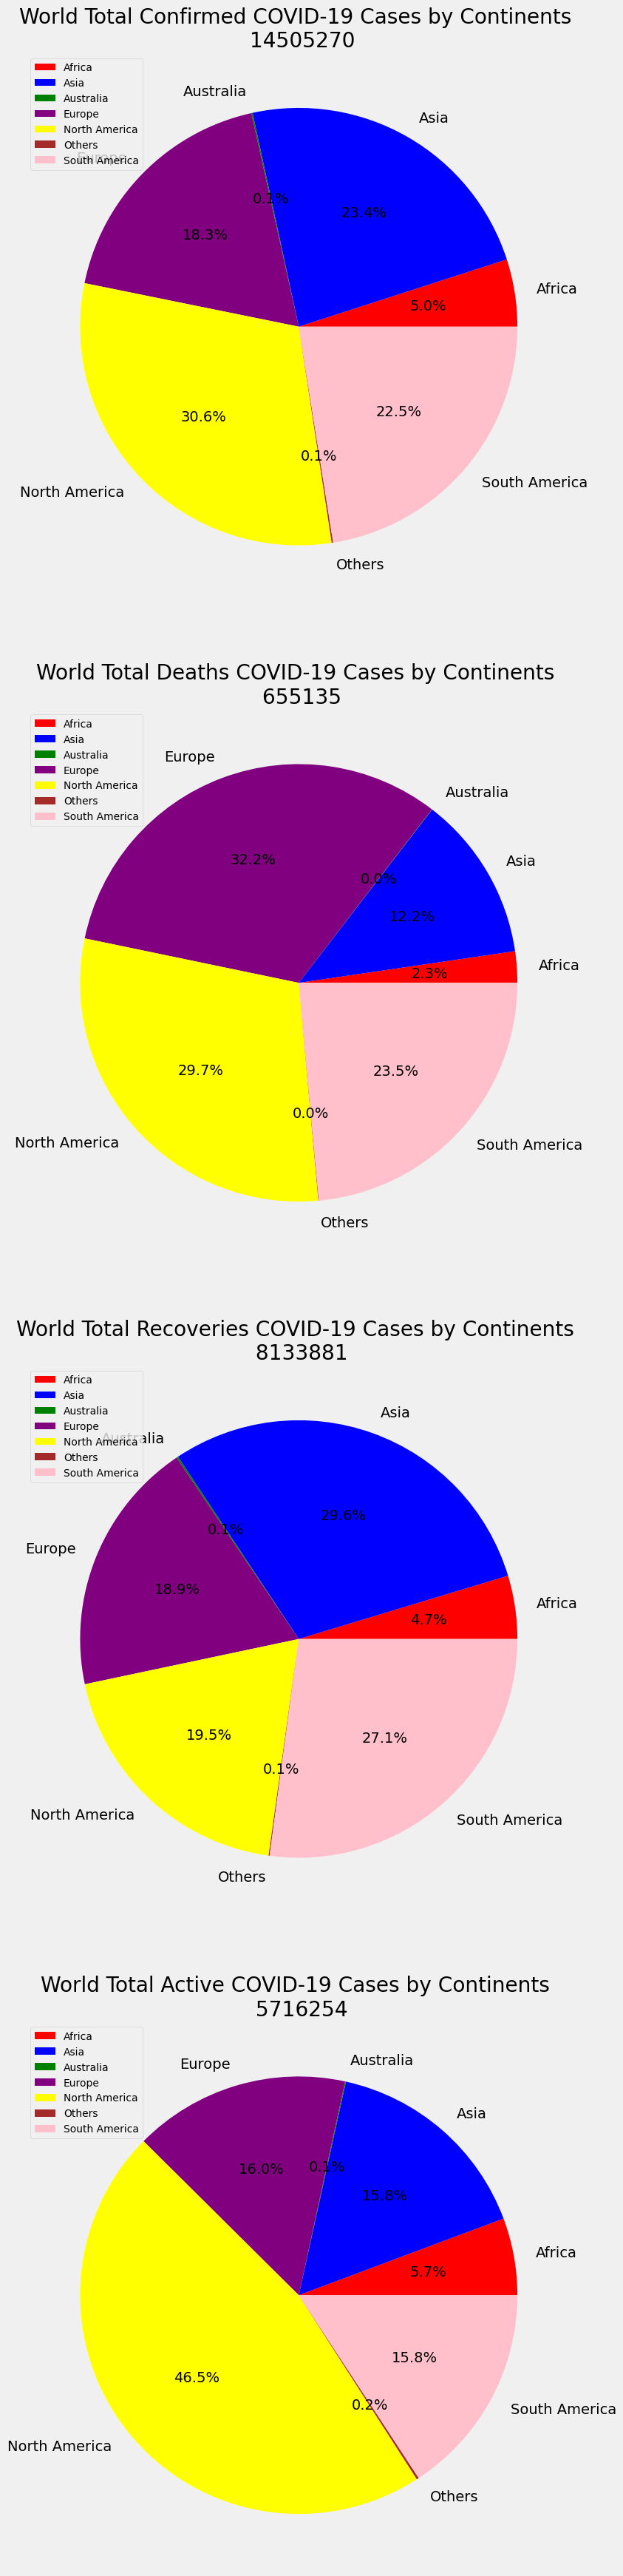

In [222]:
#Insert your code here:
figure, axis = plt.subplots(4, 1, figsize = (10, 6*7))

args = ["Confirmed", "Deaths", "Recoveries", "Active"]
continent_name = ['Africa', 'Asia', 'Australia', 'Europe', 'North America', 'Others', 'South America']
color = ["red", "blue", "green", "purple", "yellow", "brown", "pink"]
def func(pct):
  return "{:1.1f}%".format(pct)

for i, arg in enumerate(args):
    temp_list = []
    axis[i].set_title(f"World Total {arg} COVID-19 Cases by Continents \n {continent_df[arg].sum()}")
    for j, con_name in enumerate(continent_name):
        sel_con_df = continent_df.loc[[con_name]]
        temp_list.append(sel_con_df[arg].sum())
    axis[i].pie(temp_list, labels = continent_name, autopct=lambda pct: func(pct), colors = color)
    axis[i].legend(loc = "upper left", prop={'size': 10})

In [223]:
#Insert your code here:


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [224]:
p12_df = countries_df
Lat_Long_df = pd.DataFrame({"Country/Region" : confirmed_df["Country/Region"], "Lat": confirmed_df["Lat"], "Long": confirmed_df["Long"]})
Lat_Long_df = Lat_Long_df.groupby("Country/Region").mean()


In [225]:
p12_df.insert(6,"Lat",Lat_Long_df["Lat"])
p12_df.insert(7,"Long",Lat_Long_df["Long"])

In [226]:
#Insert your code here:
import branca.colormap as cm

confirmedFolium_df = p12_df.copy(deep = True)
confirmedFolium_df.reset_index(inplace = True)

confirmedFolium_df.replace('USA', "United States of America", inplace = True)
confirmedFolium_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
confirmedFolium_df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
confirmedFolium_df.replace('Congo', "Republic of the Congo", inplace = True)
confirmedFolium_df.replace('Lao', "Laos", inplace = True)
confirmedFolium_df.replace('Syrian Arab Republic', "Syria", inplace = True)
confirmedFolium_df.replace('Serbia', "Republic of Serbia", inplace = True)
confirmedFolium_df.replace('Czechia', "Czech Republic", inplace = True)
confirmedFolium_df.replace('UAE', "United Arab Emirates", inplace = True)
confirmedFolium_df.dropna(axis = 0, inplace = True, subset = ["Lat", "Long"])

covid_folium = folium.Map()
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

color_linear = cm.LinearColormap(["green", "red"], vmin=confirmedFolium_df["Confirmed"].min(), vmax=confirmedFolium_df["Confirmed"].max())

for i in range(len(confirmedFolium_df)):
    country_name = confirmedFolium_df.at[confirmedFolium_df.index[i], "Countries"]
    confirmed = confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"]
    recoveries = confirmedFolium_df.at[confirmedFolium_df.index[i], "Recoveries"]
    deaths = confirmedFolium_df.at[confirmedFolium_df.index[i], "Deaths"]
    mor_rate = confirmedFolium_df.at[confirmedFolium_df.index[i], "Mortality Rate"] 
    
    html = f'''<font size="-1"><b>{country_name}</b><br>
    <font size="-2"><b>Confirmed:</b> {confirmed}<br>
    <b>Recoveries:</b> {recoveries}<br>
    <b>Deaths:</b> {deaths}<br>
    <b>Mortality Rate:</b> {mor_rate}'''

    iframe = folium.IFrame(html=html, width=300, height=100)
    
    folium.Circle(location = [confirmedFolium_df.iloc[i].Lat, confirmedFolium_df.iloc[i].Long],
                 popup = folium.Popup(iframe, min_width = 100, max_width = 2650),
                 radius = float(confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"])/2,
                 color = color_linear(confirmedFolium_df.at[confirmedFolium_df.index[i], "Confirmed"]),
                 weight = 1,
                fill = True).add_to(covid_folium)
    
    
covid_folium

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [227]:
#Insert your code here:

mapCountries_df = p12_df.copy(deep = True)
mapCountries_df.rename(index={'USA':'United States of America'}, inplace=True)
mapCountries_df.rename(index={"Côte d'Ivoire":'Ivory Coast'}, inplace=True)
mapCountries_df.reset_index(inplace = True)

url = (
    "https://raw.githubusercontent.com/datasets/geo-countries/master/data"
)

countries_geo = f"{url}/countries.geojson"

fig = px.choropleth_mapbox(p12_df, geojson=countries_geo,
                           featureidkey = 'properties.ADMIN',
                           locations = mapCountries_df["Countries"].values,
                           color=mapCountries_df["Actives"].values,
                           color_continuous_scale="Spectral",
                           range_color=(0, np.log10(np.max(mapCountries_df["Actives"]))),
                           zoom = 1,
                           labels={'Actives':'Active Case of Covid'},
                           mapbox_style = 'open-street-map'
                          )
fig.update_traces(z=np.log10(mapCountries_df['Actives']))
fig.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10



# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [228]:
#Insert your code here:
top10 = countries_df.sort_values('Confirmed', ascending = False).head(10)
top10.reset_index()['Countries']

0               USA
1            Brazil
2             India
3            Russia
4      South Africa
5              Peru
6            Mexico
7             Chile
8    United Kingdom
9              Iran
Name: Countries, dtype: object

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [229]:
fig = go.Figure(data=[
    go.Bar(name='Actives', x=top10.index, y=top10["Actives"].values),
    go.Bar(name='Recoveries', x=top10.index, y=top10["Recoveries"].values),
    go.Bar(name='Deaths', x=top10.index, y=top10["Deaths"].values),
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_yaxes(type="log")
fig.show()


# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

No

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [230]:
#19.1
df19 = continent_df.copy(deep=True)
df19 = df19.reset_index()
df19 = df19.sort_values('Mortality Rate',ascending=False)
df19['Continents'].head(1)

3    Europe
Name: Continents, dtype: object

In [231]:
#19.2
confirmed_df19 = confirmed_df.drop(["Province/State","Lat","Long","Country/Region"],axis=1)
deaths_df19 = deaths_df.drop(["Province/State","Lat","Long","Country/Region"],axis=1)
recoveries_df19 = recoveries_df.drop(["Province/State","Lat","Long","Country/Region"],axis=1)

confirmed_df19 = confirmed_df19.groupby("continent").sum()
deaths_df19 = deaths_df19.groupby("continent").sum()
recoveries_df19 = recoveries_df19.groupby("continent").sum()

confirmed_df19 = confirmed_df19.groupby("continent").sum()
Actives19 = np.array(confirmed_df19["7/19/20"] - deaths_df19["7/19/20"] - recoveries_df19["7/19/20"])
problem19_2 = (confirmed_df19["7/19/20"] - confirmed_df19["7/9/20"])/Actives19*100
problem19_2 = problem19_2.sort_values(ascending=False)
problem19_2.head(1).keys()[0]

'Australia'

In [232]:
#19.3
df19 = continent_df.copy(deep=True)
df19 = df19.reset_index()
df19.insert(6,'Rate Recoveries',df19['Recoveries']/df19['Confirmed'])
df19 = df19.sort_values('Rate Recoveries',ascending=False)
list(df19['Continents'].head(1))[0]

'Australia'

19.1. Europe

19.2. Australia

19.3. Australia

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [233]:
#20.1
df20 = countries_df.copy(deep=True)
df20 = df20.reset_index()
df20 = df20.sort_values('Mortality Rate',ascending=False)
list(df20['Countries'].head(1))

['Yemen']

In [234]:
confirmed_df1 = confirmed_df.drop(["Province/State","Lat","Long","continent"],axis=1)
deaths_df1 = deaths_df.drop(["Province/State","Lat","Long","continent"],axis=1)
recoveries_df1 = recoveries_df.drop(["Province/State","Lat","Long","continent"],axis=1)

confirmed_df1 = confirmed_df1.groupby("Country/Region").sum(numeric_only=False)
deaths_df1 = deaths_df1.groupby("Country/Region").sum(numeric_only=False)
recoveries_df1 = recoveries_df1.groupby("Country/Region",).sum(numeric_only=False)

Actives20 = np.array(confirmed_df1["7/19/20"] - deaths_df1["7/19/20"] - recoveries_df1["7/19/20"])

problem20_2 = (confirmed_df1["7/19/20"] - confirmed_df1["7/9/20"])/Actives20*100
problem20_2 = problem20_2.sort_values(ascending=False)
problem20_2

Country/Region
Uganda                  154.761905
Qatar                   145.728966
Comoros                 142.857143
Kyrgyzstan              136.839271
Bhutan                  128.571429
                           ...    
Timor-Leste                    NaN
Tonga                          NaN
Tuvalu                         NaN
Vanuatu                        NaN
Winter Olympics 2022           NaN
Length: 201, dtype: float64

In [235]:
#20.3
df20 = countries_df.copy(deep=True)
df20 = df20.reset_index()
df20.insert(6,'Recoveries Rate',df20['Recoveries']/df20['Confirmed'])
df20 = df20.sort_values('Recoveries Rate',ascending=False)
list(df20['Countries'].head(5))

['Laos', 'Timor-Leste', 'Holy See', 'Grenada', 'Dominica']

# Problem 21
**USA dataset**

In [236]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [237]:
#21.1
sort_data = us_medical_data.sort_values('Mortality_Rate',ascending=False)
list(sort_data['Province_State'].head(1))[0]

'Connecticut'

In [238]:
#21.3
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
sort_data = us_medical_data
data = us_medical_data['Recovered']/us_medical_data['Confirmed']
sort_data.insert(10,'recovered_rate',data)
sort_data = sort_data.sort_values('recovered_rate',ascending=False)
sort_data['Province_State'].head(4)


27        Minnesota
38     North Dakota
47     South Dakota
25    Massachusetts
Name: Province_State, dtype: object

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [239]:
data = us_medical_data
data_cp = data
data = data.drop('Country_Region',axis=1)
data = data.drop('Last_Update',axis=1)
data = data.drop('ISO3',axis=1)
data = data.drop('Date',axis=1)

data = data.dropna(subset=["Deaths", "Recovered", "Active"],axis=0)
data = data.dropna(axis=1)
State =data['Province_State']
data = data.drop('Province_State',axis=1)


In [240]:
y_train = data['Confirmed']

In [241]:
def nomallize(df): #min-max normalization
    return (df-df.min())/(df.max()-df.min())

In [242]:
data = nomallize(data)


In [243]:
# y_train = data['Confirmed']

In [244]:
x_train = data.drop('Confirmed',axis=1)

In [245]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [246]:
x_train.shape

(48, 11)

In [247]:
y_train.shape

(48,)

In [248]:
class LinearRegression:
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        # Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Perform gradient descent
        mse=1
        cache_mse = 0
        while cache_mse != mse:
            cache_mse = mse
            y_predicted = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            mse = np.mean((y_predicted - y)**2)

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [249]:
model = LinearRegression(learning_rate=0.05)
model.fit(x_train, y_train)


In [250]:
result = model.predict(x_train)


In [251]:
State.shape

(48,)

In [252]:
data_frame_result =pd.DataFrame({'State':State,'Predict':result})

In [253]:
data_frame_result.sort_values('Predict',ascending=False)[0:10]

,State,Predict
36,New York,397542.263968
49,Texas,204812.271289
34,New Jersey,174915.316373
25,Massachusetts,110137.643573
3,Arizona,101831.179116
43,Pennsylvania,94653.689594
37,North Carolina,74627.317847
26,Michigan,73450.989726
24,Maryland,70335.111754
53,Virginia,66309.551958


In [258]:
y_train

array([ 44932,   1184, 101455,  24253,  39062,  46976,  12293,  10515,
          301,   1030,   8052,  48524,  31758,  16638,  17152,  66327,
         3423,  69904, 110137,  73267,  38569,  31257,   1249,  20046,
        22909,   5914, 174766,  13507, 397649,  74775,   3899,     31,
        57956,  16362,  10395,  94439,  16991,  46380,   7105,  52039,
       204710,  25469,   1251,    112,  66102,   3442,  32061,   1675],
      dtype=int64)

In [254]:
# def cof_nomallize(df): #min-max normalization
#     return df-df.min(),(df.max()-df.min())

In [255]:
# m, denta = cof_nomallize(data_cp['Confirmed'])

In [256]:
# result * denta + m